## This notebook is used to explore and plot the data and is in Python 3

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams.update({'font.size': 20})

* load the national names data and movie data created from data carpentry step

In [3]:
movie_df = pd.read_csv('data/movie_data_final.csv', encoding='latin-1')
bb_names_df = pd.read_csv('data/EndOutput.csv')

In [4]:
movie_df.head()

,Rank,Title,Year,Cast_Name,Character_Name
0,1,Gone With the Wind,1939,Thomas,Gerald
1,1,Gone With the Wind,1939,Barbara,Ellen
2,1,Gone With the Wind,1939,Vivien,Scarlett
3,1,Gone With the Wind,1939,Evelyn,Suellen
4,1,Gone With the Wind,1939,Ann,Carreen


In [5]:
bb_names_df.head()

,Unnamed: 0,Id,Name,Year,Gender,Count,pct_ch
0,0,1,Mary,1880,F,7065,0
1,1,2,Anna,1880,F,2604,0
2,2,3,Emma,1880,F,2003,0
3,3,4,Elizabeth,1880,F,1939,0
4,4,5,Minnie,1880,F,1746,0


In [6]:
year_list = np.sort(movie_df.Year.unique()).astype(np.int)
year_list

array([1937, 1939, 1940, 1942, 1945, 1946, 1950, 1952, 1953, 1955, 1956,
       1957, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1967, 1969, 1970,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1981, 1982, 1983,
       1984, 1985, 1989, 1990, 1992, 1993, 1994, 1996, 1997, 1999, 2001,
       2002, 2003, 2004, 2005, 2006, 2008, 2009, 2010, 2012, 2013, 2015])

In [7]:
len(year_list)

55

## What's the influence of cast or characters's names in popular movies on baby's name after the movie has been released?

* The following method can plot the trends of baby names that were used as names of characters in popular movies for a specific year. For example, in 1997 "Titanic" was released and Jack was the leading character. The trend of Jack can be visualized by the following method. It will display the history of Jack from 10 years before the movie was released (1987) to now. The red vertical line indicates the time the movie was released. 
* It can be used to plot trends of movie cast names, too. Just comment out lines 4-6 and enable the lines 8-10.  

In [8]:
def plot_names_by_year(year):
    lower_limit = year - 10 if year - 10 >= 1937 else year 
# based on character name
    character_list = movie_df[movie_df['Year'] == year].Character_Name.unique()
    bb_names_character = bb_names_df[(bb_names_df['Name'].isin(character_list))&(bb_names_df['Gender']==('M'or'F'))&((bb_names_df['Year']>lower_limit))] 
    bb_names_character.pivot(index='Year', columns='Name', values='pct_ch').plot().axvline(year, color='r')
# based on cast name
#     cast_list = movie_df[movie_df['Year'] == year].Cast_Name.unique()
#     bb_names_cast = bb_names_df[(bb_names_df['Name'].isin(cast_list))&(bb_names_df['Gender']==('M'or'F'))] 
#     bb_names_cast.pivot(index='Year', columns='Name', values='Count').plot()

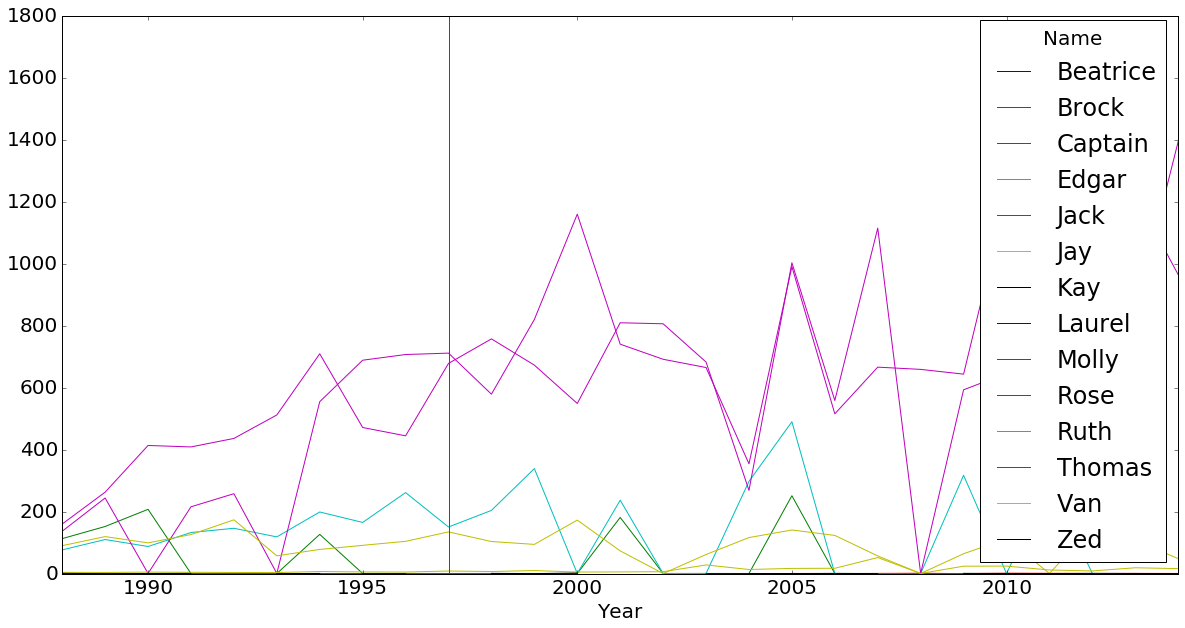

In [9]:
plot_names_by_year(1997)  

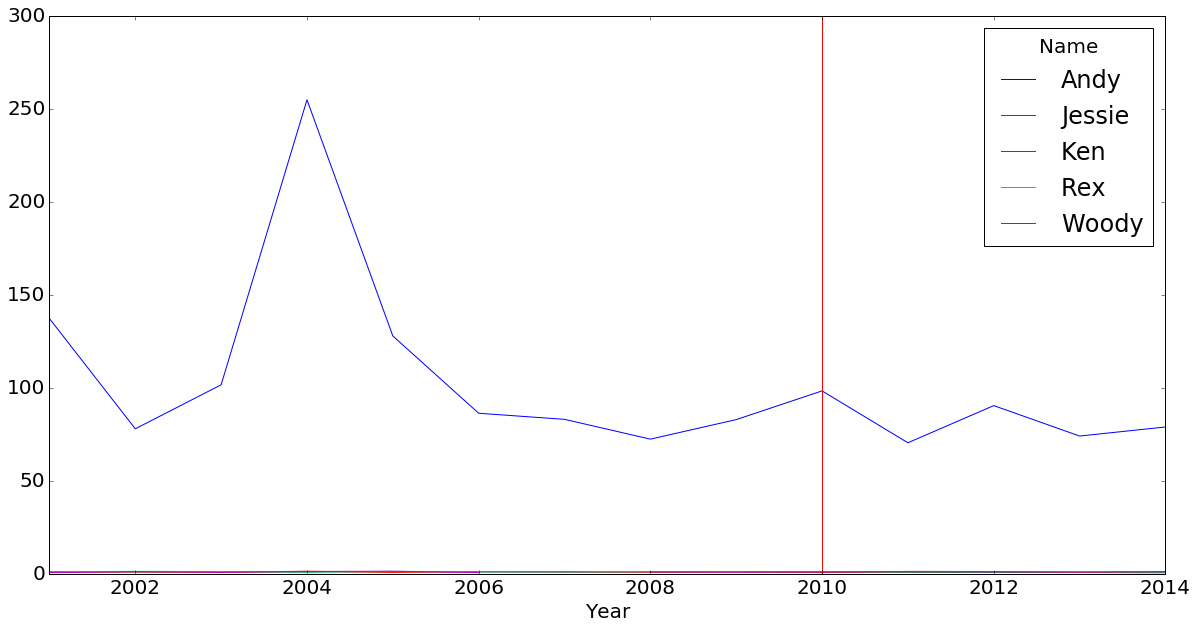

In [10]:
plot_names_by_year(2010)

* From the result we can see this method is not good because there are too many characters in one year and it's hard to differentiate the contributions of different movies. 

* Another way is visualizing the data by each movie. 

* The following method can plot the trends of baby names that were used as names of characters in a specific popular movie. For example, in movie "Titanic" Jack was the leading character. The trend of Jack can be visualized by the following method. It will display the history of Jack from 10 years before the movie was released (1987) to now. The red vertical line indicates the time the movie was released. 

* It can be used to plot trends of movie cast names, too. Just comment out lines 5-7 and enable the lines 9-11. 

In [11]:
def plot_names_by_movie(title):
    year = movie_df[movie_df['Title']==title].Year.unique()[0]
    lower_limit = year - 10 if year - 10 >= 1937 else year 
# based on character name
    character_list = movie_df[movie_df['Title']==title].Character_Name.unique()
    bb_names_character = bb_names_df[(bb_names_df['Name'].isin(character_list))&(bb_names_df['Gender']==('M'or'F'))&((bb_names_df['Year']>lower_limit))] #[['Name','Year','Gender','Count']]
    bb_names_character.pivot(index='Year', columns='Name', values='pct_ch').plot(title=title+', '+str(year),fontsize=20).axvline(year, color='r')
# based on cast name
#     cast_list = movie_df[movie_df['Title']==title].Cast_Name.unique()
#     bb_names_cast = bb_names_df[(bb_names_df['Name'].isin(cast_list))&(bb_names_df['Gender']==('M'or'F'))&((bb_names_df['Year']>lower_limit))] #[['Name','Year','Gender','Count']]
#     bb_names_cast.pivot(index='Year', columns='Name', values='Count').plot()

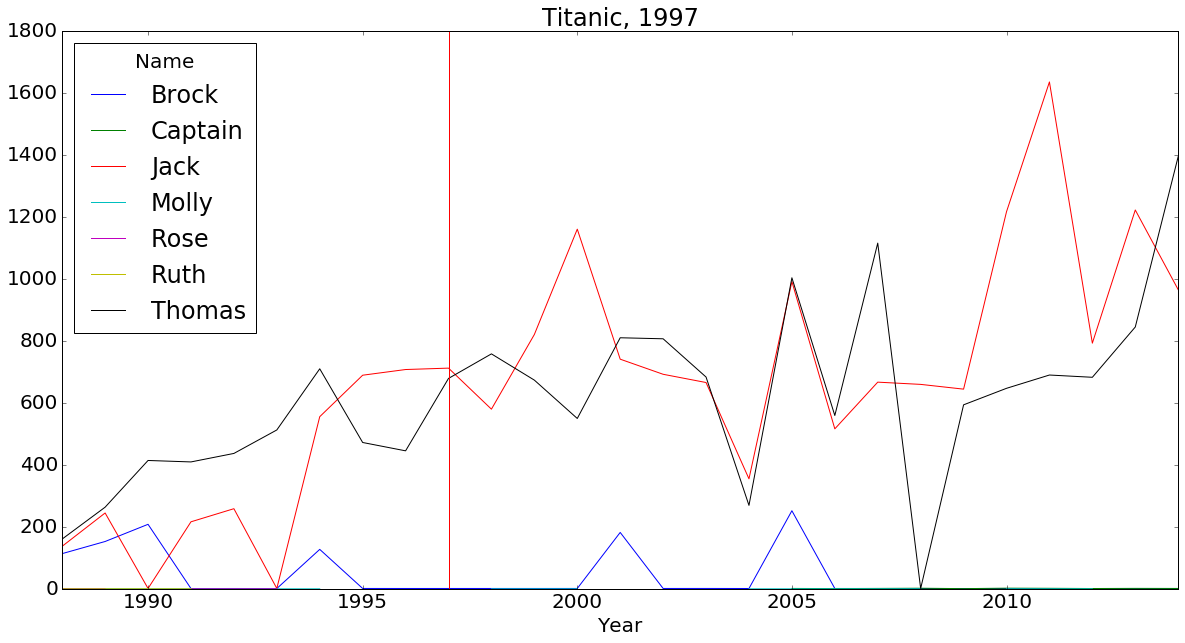

In [12]:
plot_names_by_movie('Titanic')

* No obvious trend for "Titanic". Althogh Jack is increasing, it's not a spike. 

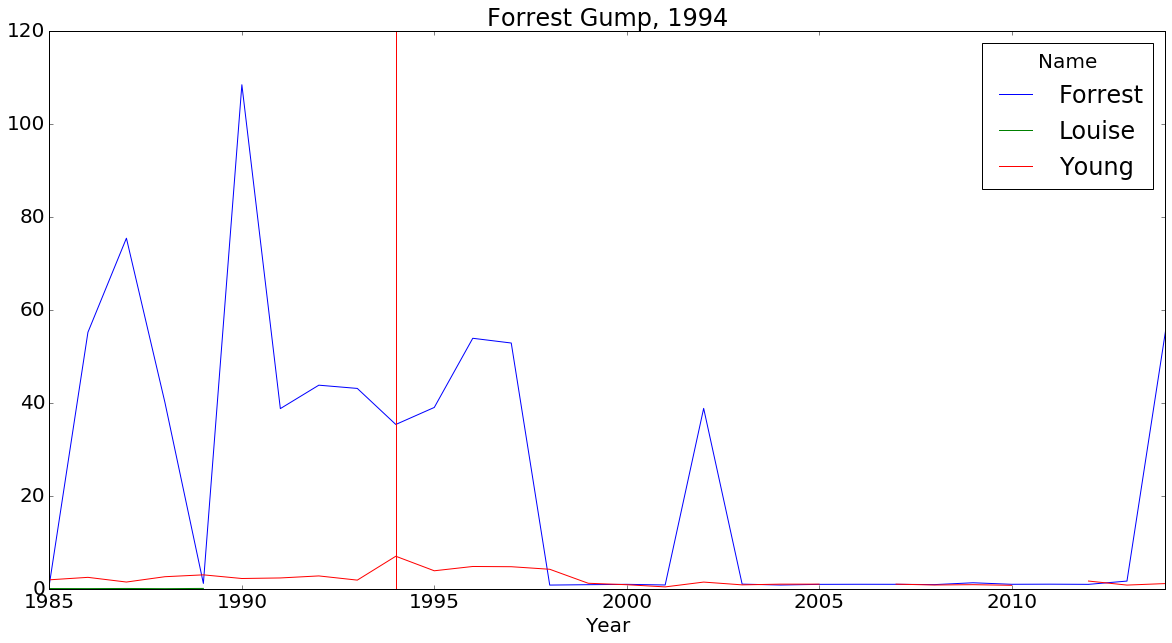

In [13]:
plot_names_by_movie('Forrest Gump')

* There is an obvious spike for Forrest in 1994

* What about the famous Star Wars series?

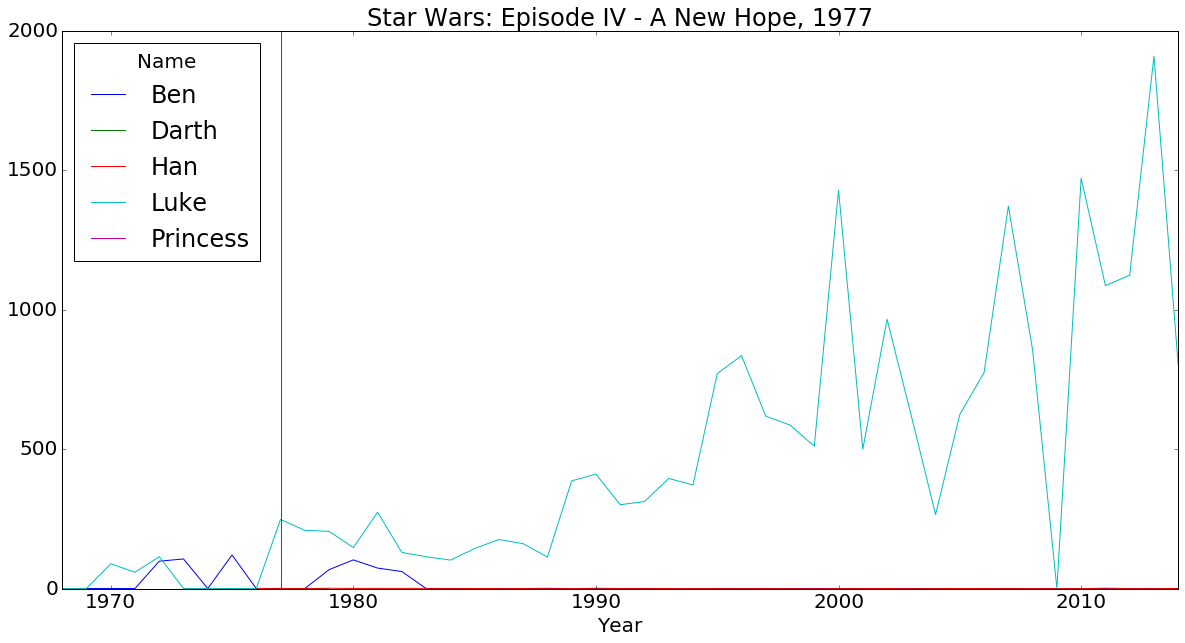

In [14]:
plot_names_by_movie('Star Wars: Episode IV - A New Hope')  # 1977

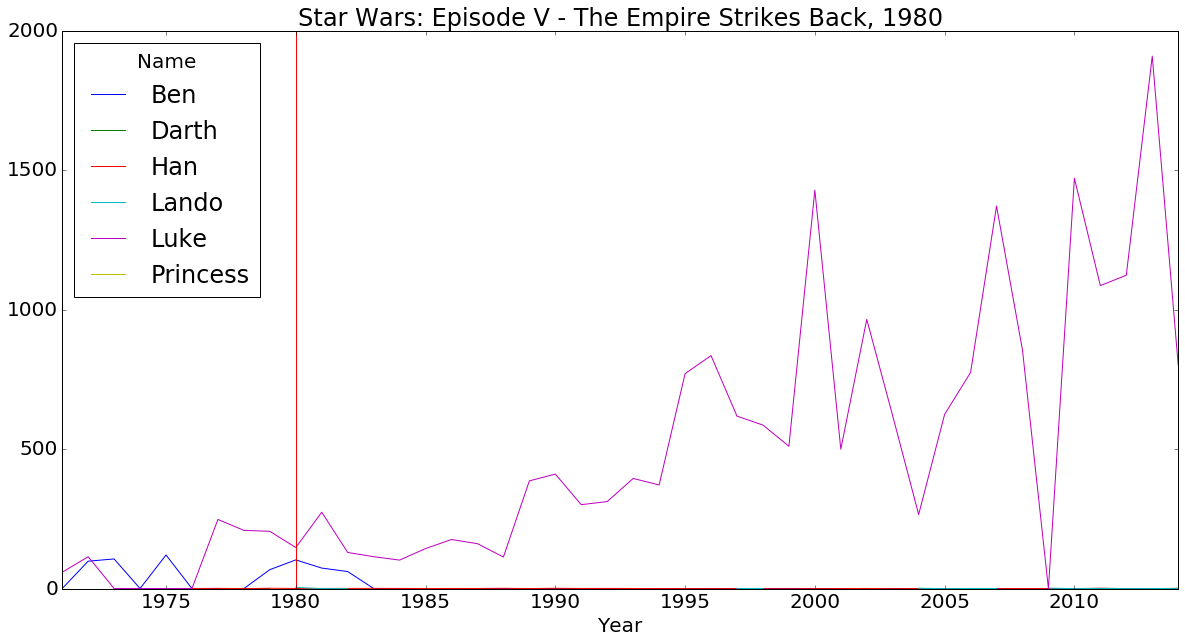

In [15]:
plot_names_by_movie('Star Wars: Episode V - The Empire Strikes Back')  # 1980

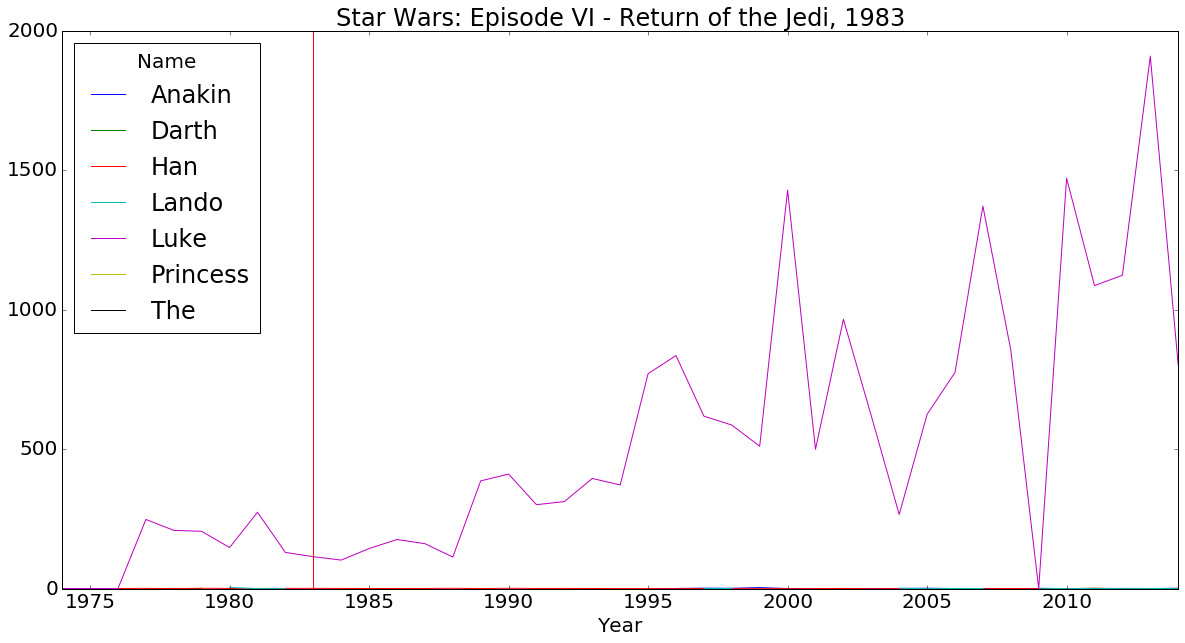

In [16]:
plot_names_by_movie('Star Wars: Episode VI - Return of the Jedi')  # 1983

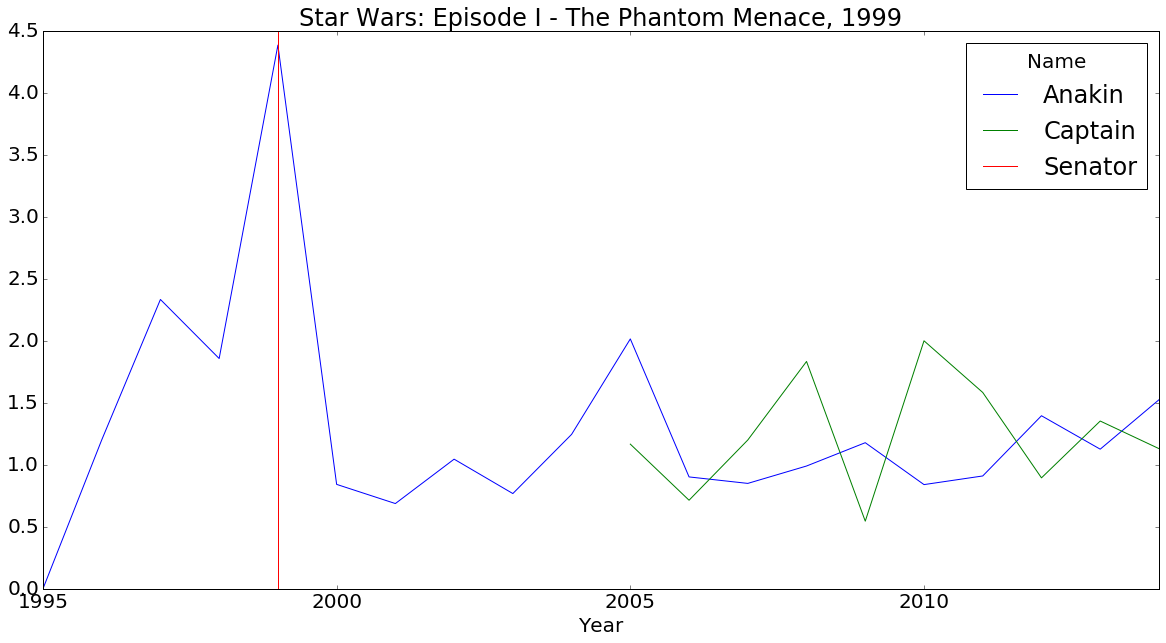

In [17]:
plot_names_by_movie('Star Wars: Episode I - The Phantom Menace')  # 1999

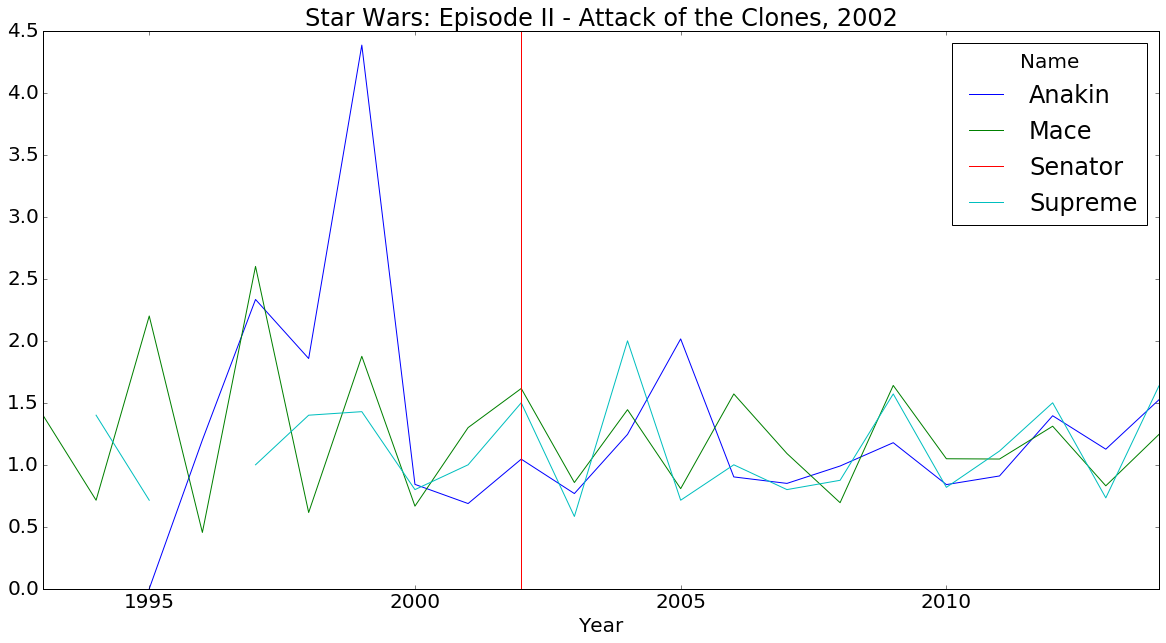

In [18]:
plot_names_by_movie('Star Wars: Episode II - Attack of the Clones')  # 2002

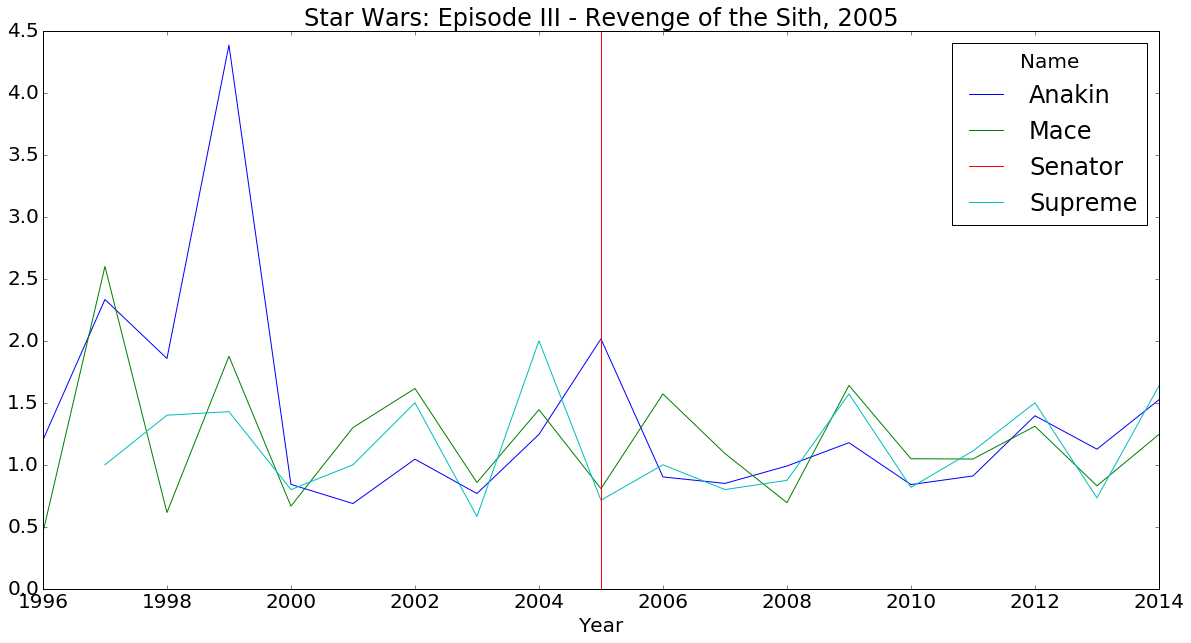

In [19]:
plot_names_by_movie('Star Wars: Episode III - Revenge of the Sith')  # 2005

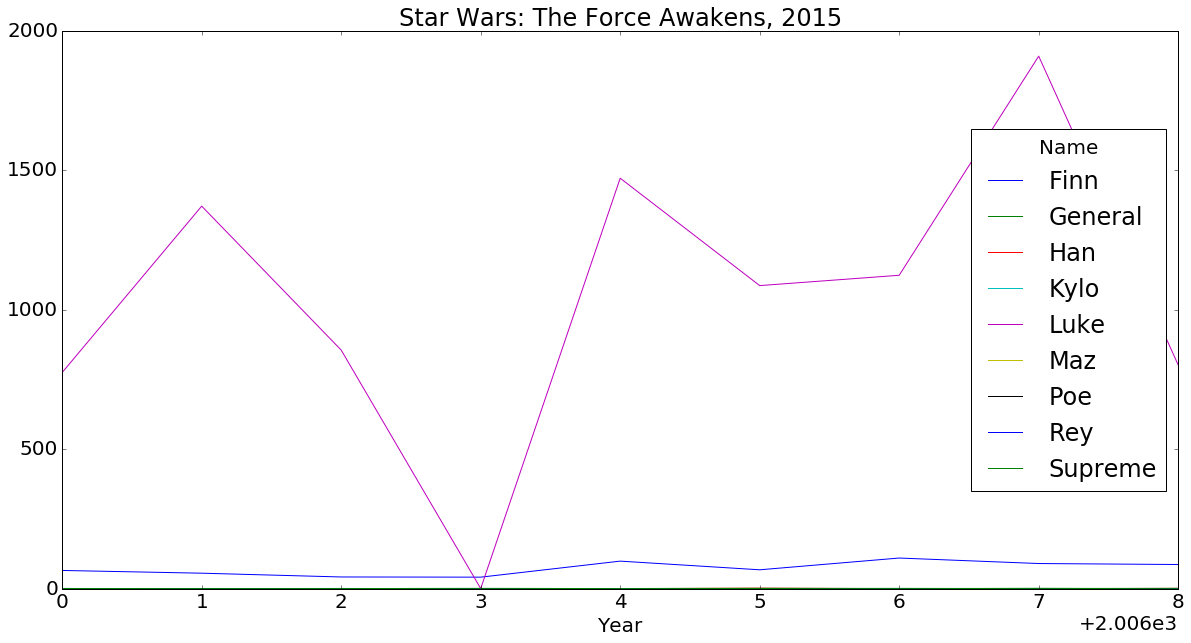

In [20]:
plot_names_by_movie('Star Wars: The Force Awakens')  # 2015

* Luke was not a popular name before the release of Star Wars (1977). After 1977, Luke became more and more popular and every episode will cause some spikes in baby names. Anakin (Darth Wader) became popular since the release of episode I in 1999 and after that there would be a spike for every new episode.  

## The names of characters in popular movies do have influece on baby names. For more common names, such as Jack, it's hard to observe a significant influence because any spikes will be diluted by the large population base. For uncommon names, such as Luke and Anakin, it's easier to see the influence. 